# Step10: xx

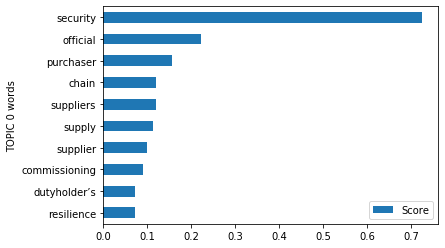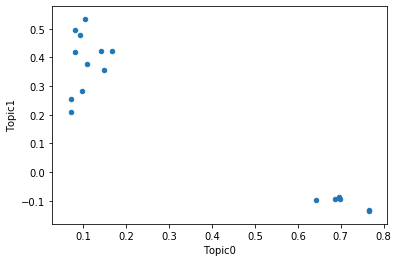!

|**[Overview](#Overview)** |**[Installation](#Installation)||**[Prior-steps](#Prior-steps)**|**[How-to-use](#How-to-use)**|**[Next-steps](#Next-steps)**|

# Overview 

# How-to-use

# Installation

Check installation has been made, as per the [READme](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/README.md)

## Prior-steps
Step 5 which provides records for the whole library

# How-to-use

# Load data

In [39]:
from gensim import similarities, models, corpora
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
#hide
import os
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"

In [3]:
import json
with open(directory+"Corpus_as_BOW.json", "r") as read_file:
      Corpus_as_BOW= json.load(read_file)

In [4]:
loaded_TFIDF_model = models.TfidfModel.load(directory+'model-from-input-library.tfidf')

In [5]:
import json
with open(directory+"Corpus_as_list.json", "r") as read_file:
      Corpus_as_list= json.load(read_file)

In [6]:
with open(directory+"Corpus_names_of_documents.json", "r") as read_file:
      Corpus_names= json.load(read_file)

In [7]:
Corpus_as_TFIDF = loaded_TFIDF_model[Corpus_as_BOW]

In [8]:
Names_of_documents=(pd.read_csv(directory+'Corpus_names_of_documents.csv'))

In [9]:
from gensim.corpora import Dictionary
loaded_dictionary = Dictionary.load(directory+'Library.dict')

**CREATE TOPIC MODEL via LSI** via CBOW AND TFIDF

In [10]:
# LSI APPLIED ON TOP ON TFIDF
#now applying an LSI to the first corpus, by working on top of its representation as a TFIDF
# here we have created a two dim LSI space
#Presumably we could create one on top of just the CBOW too,just not as good
lsi_from_TFIDF= models.LsiModel(Corpus_as_TFIDF, id2word=loaded_dictionary, num_topics=3) # initialize an LSI transformation
lsi_from_TFIDF.save(directory+'model-from-input-library.lsi')
#It is correct how it has this odd double-barrelled structure: 
#model = LsiModel(common_corpus, id2word=common_dictionary)
# >>> vectorized_corpus = model[common_corpus]  # vectorize input copus in BoW format

In [11]:
#hide
# lsi_from_TFIDF.print_topics(num_topics=2, num_words=5) #-1 means show all topics .In significance order. Remember also _ve Contribs

## Words dominant in Topic 0

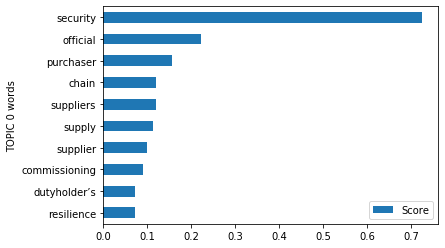

In [60]:
Topic_0_words=lsi_from_TFIDF.show_topic(0,15)
df_topic0 = pd.DataFrame(Topic_0_words, columns =['TOPIC 0 words', 'Score'])
df_topic0 = df_topic0[::-1]
df_topic0=df_topic0.iloc[[0,1,5,7,9,10,11,12,13,14],] # use iloc to remove rows with unhelpful words
df_topic0.plot(kind='barh', x='TOPIC 0 words', y="Score")

In [82]:
df0=df_topic0.sort_values(by=['Score'],ascending=False,ignore_index=True)

In [87]:
df0['TOPIC 0 words']

0         security
1         official
2        purchaser
3            chain
4        suppliers
5           supply
6         supplier
7    commissioning
8     dutyholder’s
9       resilience
Name: TOPIC 0 words, dtype: object

## Words dominant in Topic 1

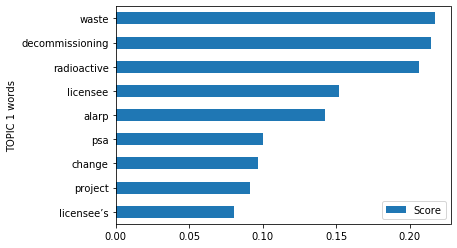

In [78]:
Topic_1_words=lsi_from_TFIDF.show_topic(1,15)
df_topic1 = pd.DataFrame(Topic_1_words, columns =['TOPIC 1 words', 'Score'])
df_topic1 = df_topic1[::-1]
df_topic1=df_topic1.iloc[[0,3,5,7,9,10,12,13,14],]
df_topic1.plot(kind='barh', x='TOPIC 1 words', y="Score")

In [88]:
df1=df_topic1.sort_values(by=['Score'],ascending=False,ignore_index=True)

In [89]:
df1['TOPIC 1 words']

0              waste
1    decommissioning
2        radioactive
3           licensee
4              alarp
5                psa
6             change
7            project
8         licensee’s
Name: TOPIC 1 words, dtype: object

## Reduce the Corpus to a data frame
Take the Corpus (represented now as an LSI vector space) and reduce it to 2 dimenions, one per two topics

In [14]:
Corpus_as_LSI = lsi_from_TFIDF[Corpus_as_TFIDF] 
Corpus_as_LSI_1=np.asarray(Corpus_as_LSI, dtype=None, order='C')
Corpus_as_LSI_2=np.hsplit(Corpus_as_LSI_1,(2,3))
Corpus_as_LSI_3=np.delete(Corpus_as_LSI_2[0], obj=0, axis=2)
Corpus_as_LSI_3=np.squeeze(Corpus_as_LSI_3,2)

In [15]:
df=pd.DataFrame((Corpus_as_LSI_3),columns =['Topic0', 'Topic1'])

In [16]:
df['Corpus_names']=pd.DataFrame(Corpus_names)

## Which documents are about which topic?

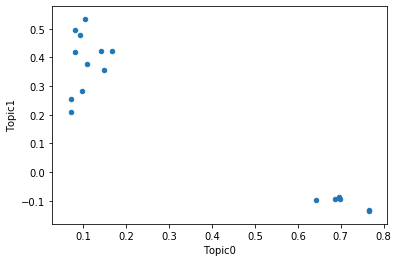

In [40]:
df.plot(kind='scatter', x='Topic0', y="Topic1")

## Topic 0 cluster of docs

In [35]:
df.sort_values(by=['Topic0'])[0:5]

,Topic0,Topic1,Corpus_names
12,0.070111,0.254496,Construction Assurance ns-tast-gd-076.pdf.txt
11,0.070718,0.208123,Reliability and resilience of the security sys...
7,0.079818,0.495859,Supplier capability cns-tast-gd-4.2.pdf.txt
5,0.081395,0.417496,Probabilistic Safety Analysis.pdf.txt
6,0.092479,0.479240,Management of Radioactive material ns-tast-gd-...


## Topic 1 cluster of docs

In [36]:
df.sort_values(by=['Topic1'])[0:11]

,Topic0,Topic1,Corpus_names
10,0.766014,-0.135334,Control of processes involving nuclear matter ...
16,0.766102,-0.130442,PM_guidance_for_Energy_Projects 19.43.14.txt
14,0.642180,-0.095707,oversight of items or services cns-tast-gd-4.3...
0,0.686660,-0.094705,Fundamental Principles ns-tast-gd-004.pdf.txt
15,0.698480,-0.094647,Procedure Design and Administrative Controls.p...
8,0.696283,-0.085355,nuclear construction sites cns-tast-gd-6.6.pdf...
11,0.070718,0.208123,Reliability and resilience of the security sys...
12,0.070111,0.254496,Construction Assurance ns-tast-gd-076.pdf.txt
13,0.096179,0.283411,Guidance on the Demonstration of ALARP ns-tast...
1,0.148400,0.354418,Design Safety Assurance ns-tast-gd-057.pdf.txt


In [23]:
# can Update model with new corpus using add_documents(corpus, chunksize=None, decay=None)
#can also save the LSI model

In [24]:
#OPTIONAL
#this model can now be applied to another corpus other than the training one, not just individaul documents
#i have not pulled in a second corpus but this is how you would do it. Note you pull in a corpus (processed as above), not just docs. 
#corpus2nd_tfidf = TFIDF_MODEL[corpus2nd]
# for doc in corpus2nd_tfidf:
#   print(doc)

   **LSI VIA TFIDF**

Cosine measure returns similarities in the range <-1, 1> (the greater, the more similar)

# Next steps
Step 13 to create a knowledge graph from this topic model

# Acknowledgements

This project relies extensively on the Gensim library, and the [examples](https://radimrehurek.com/gensim/auto_examples/index.html) provided by its creator Radim Hurek. I have done nothing more than apply a little of this to Portfolio management. The examples cited above would be the best way to get a full introduction to the capabilities of Gensim


@inproceedings{rehurek_lrec,
      title = {{Software Framework for Topic Modelling with Large Corpora}},
      author = {Radim {\v R}eh{\r u}{\v r}ek and Petr Sojka},
      booktitle = {{Proceedings of the LREC 2010 Workshop on New
           Challenges for NLP Frameworks}},
      pages = {45--50},
      year = 2010,
      month = May,
      day = 22,
      publisher = {ELRA},
      address = {Valletta, Malta},
      note={\url{http://is.muni.cz/publication/884893/en}},
      language={English}
}